largeqsvを再現させます
pythonのテスト

In [1]:
a=1
print(a)


1


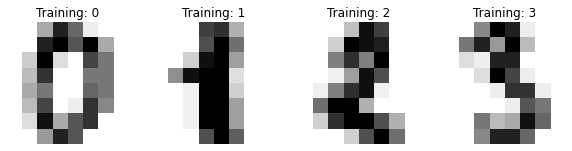

In [3]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# base on https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [9]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import LearningCircuit
from skqulacs.circuit import create_npqc_ansatz



# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))



n_qubit=8
# QSVC回路を作ります　create_npqc_ansatzでは、8qubit,8層なので72個の入力スロットがあります
#入力可能数が実入力数より多い場合、余った分は実入力の始めのほうが採用されます
#例えば8入力スロットに対して3実入力の場合、01201201になります
circuit = create_npqc_ansatz(n_qubit,8,0.035)
clf = QSVC(circuit)

# Split data into 72% train and 28% test subsets
# 論文では1300件をtrainしていたはず
# len=1797  1797*72%=1293 大体同じ
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, train_size=0.72, shuffle=True
)

# QSVCで学習をさせます
clf.fit(X_train, y_train)

# predictします
predicted = clf.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted))

0.9702380952380952


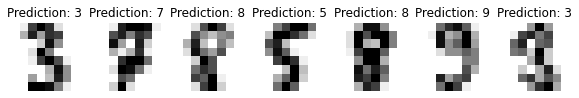

In [11]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  1  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  2  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0 48  0  0  0]
 [ 0  0  0  0  1  0  0 53  0  0]
 [ 0  4  0  0  0  0  0  0 49  0]
 [ 0  0  0  1  0  1  0  3  2 51]]


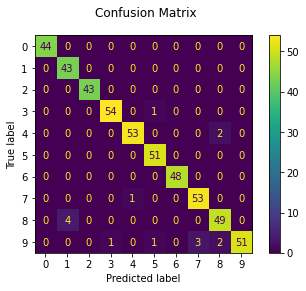

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
print(n_samples)

1797


test sizeを変えたときの、正解率のグラフを作ります

test=残り全部 これを7回やる

本来はtest=200で、 20回 です。

変更理由は、動作時間です。

これでも24分かかっています。



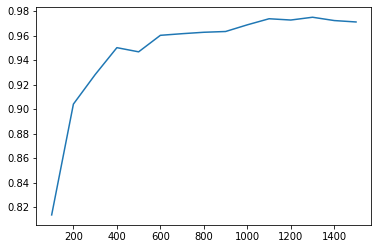

In [19]:
from skqulacs.qsvm import QSVC
from skqulacs.circuit import LearningCircuit
from skqulacs.circuit import create_npqc_ansatz
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
acc_list=[]

for trainsize in range(100,1501,100):
    acc_list.append(0.0)
    for kai in range(7):
        n_qubit=8
        # QSVC回路を作ります　create_npqc_ansatzでは、8qubit,8層なので72個の入力スロットがあります
        #入力可能数が実入力数より多い場合、余った分は実入力の始めのほうが採用されます
        #例えば8入力スロットに対して3実入力の場合、01201201になります
        circuit = create_npqc_ansatz(n_qubit,8,0.035)
        clf = QSVC(circuit)

        X_train, X_test, y_train, y_test = train_test_split(
            data, digits.target, train_size=trainsize, shuffle=True
        )

        # QSVCで学習をさせます
        clf.fit(X_train, y_train)

        # predictします
        predicted = clf.predict(X_test)
        acc_list[-1]+=accuracy_score(y_test, predicted)/7

pyplot.plot(range(100,1501,100),acc_list)
pyplot.show()
